In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# 📥 Load the CIFAR-10 dataset and split it into training and testing sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

<ipython-input-5-1152ece44afc>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


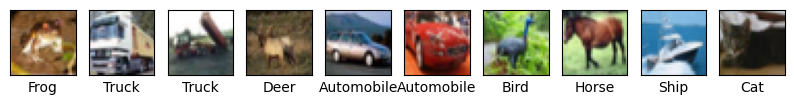

In [ ]:
# 🖼️ Display the first 10 images from the training set with their corresponding class labels
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()


In [ ]:
# 🧠 Build and compile a CNN model for image classification on the CIFAR-10 dataset
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 🚀 Train the CNN model and evaluate its performance on the test set
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3541 - loss: 1.7518 - val_accuracy: 0.5517 - val_loss: 1.2484
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.5884 - loss: 1.1640 - val_accuracy: 0.6265 - val_loss: 1.0609
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.6448 - loss: 1.0092 - val_accuracy: 0.6736 - val_loss: 0.9446
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6903 - loss: 0.8847 - val_accuracy: 0.6573 - val_loss: 0.9878
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7113 - loss: 0.8229 - val_accuracy: 0.6731 - val_loss: 0.9377
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7381 - loss: 0.7539 - val_accuracy: 0.6881 - val_loss: 0.9004
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7579 - loss: 0.6950 - val_accuracy: 0.6989 - val_loss: 0.8903
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.7690 -

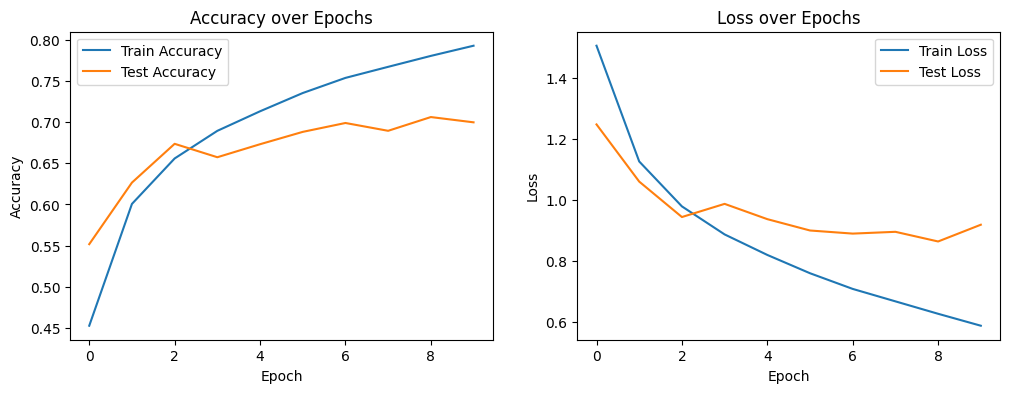

In [ ]:
# 📊 Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# 📈 Subplot 1: Plotting training and test accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 📉 Subplot 2: Plotting training and test loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 📬 Show the final plots
plt.show()
